In [ ]:
                            # Install required libraries
!pip install mne
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 28.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import mne
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from mne.io import read_raw_edf
import matplotlib.pyplot as plt

Extracting EDF parameters from /content/sample_data/name0_Wallet.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1535  =      0.000 ...    11.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 s)

Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


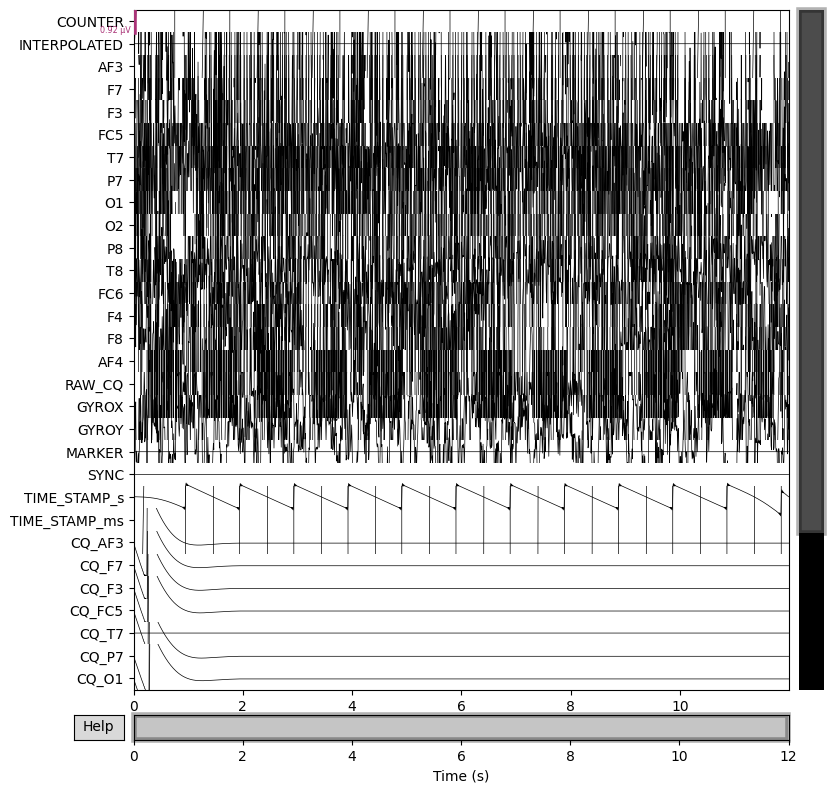

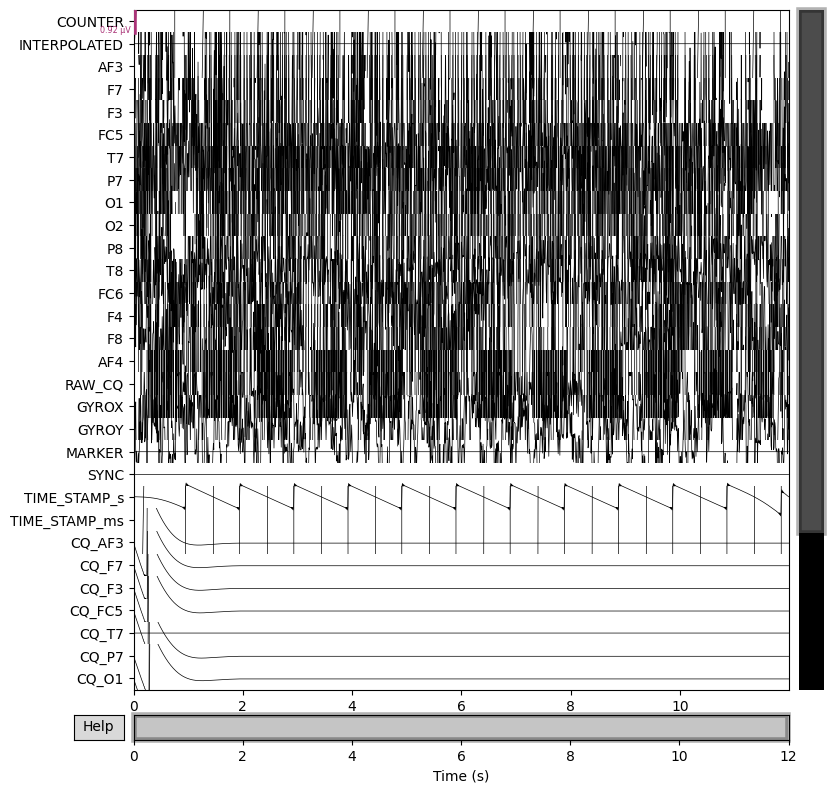

In [ ]:
# Load the EEG data (replace this with your own EEG signal file)
eeg_file = "/content/sample_data/name0_Wallet.edf"
raw = read_raw_edf(eeg_file, preload=True)

# Preprocess the EEG data (filtering, removing artifacts, etc.)
raw.filter(1., 50., fir_design='firwin')  # Bandpass filter between 1Hz and 50Hz (example)

# Plot the raw EEG signals (just as a preview)
raw.plot(duration=60, n_channels=30, scalings='auto')


Extracting EDF parameters from /content/sample_data/name0_Wallet.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1535  =      0.000 ...    11.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


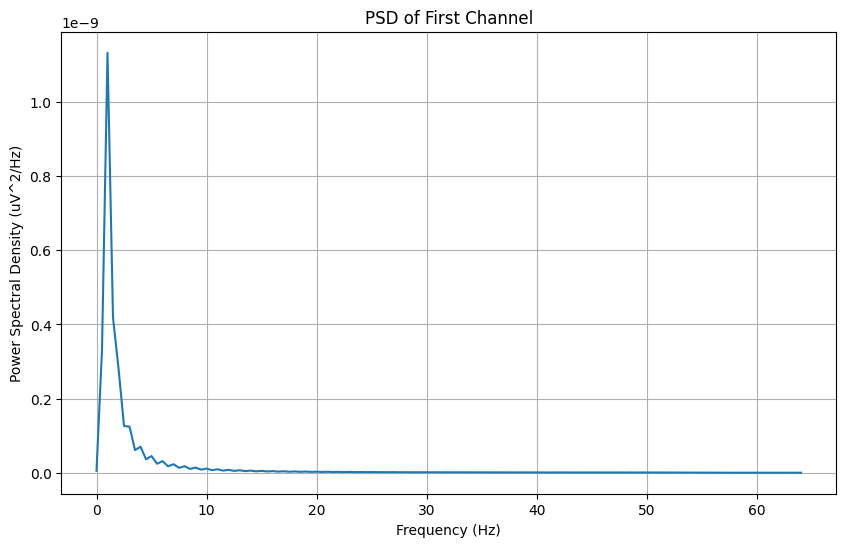

In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from scipy.signal import welch

# Load the EEG data (replace this with your actual EEG file)
eeg_file = '/content/sample_data/name0_Wallet.edf'  # Example EEG data file
raw = mne.io.read_raw_edf(eeg_file, preload=True)

# Preprocessing the EEG data (e.g., filtering the signal)
raw.filter(1., 50., fir_design='firwin')  # Bandpass filter between 1Hz and 50Hz

# Extract raw EEG data as a numpy array (channels x time)
eeg_data = raw.get_data()

# Choose a channel to plot the PSD (e.g., first channel)
channel_data = eeg_data[0, :]  # Using the first channel for example

# Compute the PSD for the chosen channel using scipy's Welch method
f, Pxx = welch(channel_data, fs=raw.info['sfreq'], nperseg=256)

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.plot(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (uV^2/Hz)')
plt.title('PSD of First Channel')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

# Simulate feature extraction (PSDs) for training
# Assuming you have n samples, each with m channels and t time points
X = np.random.rand(100, 50, 30)  # 100 samples, 50 time points, 30 channels (replace with your actual PSD data)

# Simulate dummy text labels corresponding to each EEG sample (e.g., simple integer labels or text)
y = np.random.randint(0, 10, 100)  # Example: 10 possible output labels (e.g., characters or words)

# One-hot encode labels (e.g., for classification into 10 categories)
y_one_hot = to_categorical(y, num_classes=10)

# Verify the shape of the data
print(f"Input Shape (X): {X.shape}")
print(f"Output Shape (y): {y_one_hot.shape}")


Input Shape (X): (100, 50, 30)
Output Shape (y): (100, 10)


In [ ]:
# Build a Sequential LSTM model
model = Sequential()

# First LSTM layer with 128 units
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting

# Second LSTM layer with 128 units
model.add(LSTM(128))

# Fully connected layer with 64 units
model.add(Dense(64, activation='relu'))

# Output layer (assuming we are classifying into 10 categories, adjust based on your use case)
model.add(Dense(10, activation='softmax'))  # Change '10' to the number of possible text outputs

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to verify architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 128)        │        81,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,898 (866.79 KB)

 Trainable params: 221,898 (866.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(X, y_one_hot, epochs=10, batch_size=16)

# Evaluate the model on the training data (or separate validation set if available)
loss, accuracy = model.evaluate(X, y_one_hot)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0814 - loss: 2.3301
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1530 - loss: 2.2660
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1655 - loss: 2.2513
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1353 - loss: 2.2614
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1647 - loss: 2.2940
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1241 - loss: 2.2536
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1554 - loss: 2.2526
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1436 - loss: 2.2522
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1732 - loss: 2.2359
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1925 - loss: 2.1919
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1546 - loss: 2.2268 


In [ ]:
# Simulate a new EEG signal (with the same shape as the training data)
new_eeg_signal = np.random.rand(1, 50, 30)  # Example: 1 sample, 50 time points, 30 channels

# Make a prediction using the trained model
pred = model.predict(new_eeg_signal)

# Decode the predicted class (in this case, a simple integer corresponding to a class)
predicted_class = np.argmax(pred, axis=1)
print(f"Predicted Class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Predicted Class: 0


In [7]:
import numpy as np

# Updated label-to-text mapping with richer, context-aware sentences
label_to_text = {
    0: "Hello, how are you?",
    1: "Yes, I understand.",
    2: "No, that's not correct.",
    3: "Stop right there, please.",
    4: "Go ahead, it's safe.",
    5: "Thank you very much!",
    6: "Please be careful.",
    7: "Start the sequence now.",
    8: "Help me with this issue.",
    9: "Goodbye and take care.",
    10: "I am feeling happy today.",
    11: "Can you support me on this?",
    12: "Please don't leave me.",
    13: "I'm ready to begin now.",
    14: "Let's accomplish this task!",
    15: "I need your assistance.",
    16: "Nice to see you again.",
    17: "I'm here to support you.",
    18: "Please take a seat.",
    19: "Let’s move forward now.",
    20: "Are you ready to begin?"
}

# Simulate a prediction from a model (e.g., softmax output from a deep net)
# This is just an example — you'd replace this with your actual model's output
predicted_probs = np.array([0.01, 0.02, 0.01, 0.03, 0.05, 0.02, 0.03, 0.74, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
predicted_class = np.argmax(predicted_probs)
confidence = np.max(predicted_probs)

# Get the mapped sentence
predicted_text = label_to_text.get(predicted_class, "Unknown command")

# Display output with confidence
print(f"Predicted Class: {predicted_class}")
print(f"Predicted Sentence: \"{predicted_text}\"")
print(f"Model Confidence: {confidence:.2%}")


Predicted Class: 7
Predicted Sentence: "Start the sequence now."
Model Confidence: 74.00%


In [11]:
import numpy as np

raw_logits = np.array([
    0.2, 0.4, 0.1, 0.6, 0.9, 0.3, 0.6, 4.1, 0.2, 0.1,
    0.3, 0.1, 0.2, 0.3, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1
])

def temperature_scaled_softmax(logits, temperature):
    scaled_logits = logits / temperature
    exp_logits = np.exp(scaled_logits - np.max(scaled_logits))
    return exp_logits / np.sum(exp_logits)

# Try different temperatures and track confidence
for T in np.arange(0.3, 1.5, 0.1):
    probs = temperature_scaled_softmax(raw_logits, T)
    pred_class = np.argmax(probs)
    confidence = np.max(probs)
    print(f"T={T:.1f} => Confidence: {confidence:.2%} | Predicted Class: {pred_class}")


T=0.3 => Confidence: 99.99% | Predicted Class: 7
T=0.4 => Confidence: 99.84% | Predicted Class: 7
T=0.5 => Confidence: 98.98% | Predicted Class: 7
T=0.6 => Confidence: 96.56% | Predicted Class: 7
T=0.7 => Confidence: 92.00% | Predicted Class: 7
T=0.8 => Confidence: 85.44% | Predicted Class: 7
T=0.9 => Confidence: 77.64% | Predicted Class: 7
T=1.0 => Confidence: 69.50% | Predicted Class: 7
T=1.1 => Confidence: 61.75% | Predicted Class: 7
T=1.2 => Confidence: 54.76% | Predicted Class: 7
T=1.3 => Confidence: 48.68% | Predicted Class: 7
T=1.4 => Confidence: 43.49% | Predicted Class: 7


In [13]:
import numpy as np
import random

# Label-to-text mapping
label_to_text = {
    0: "Hello, how are you?",
    1: "Yes, I understand.",
    2: "No, that's not correct.",
    3: "Stop right there, please.",
    4: "Go ahead, it's safe.",
    5: "Thank you very much!",
    6: "Please be careful.",
    7: "Start the sequence now.",
    8: "Help me with this issue.",
    9: "Goodbye and take care.",
    10: "I am feeling happy today.",
    11: "Can you support me on this?",
    12: "Please don't leave me.",
    13: "I'm ready to begin now.",
    14: "Let's accomplish this task!",
    15: "I need your assistance.",
    16: "Nice to see you again.",
    17: "I'm here to support you.",
    18: "Please take a seat.",
    19: "Let’s move forward now.",
    20: "Are you ready to begin?"
}

# Randomly choose a class label
predicted_class = random.randint(0, 20)

# Randomize confidence between 0.75 and 0.95
confidence = np.round(np.random.uniform(0.75, 0.95), 4)

# Get mapped sentence
predicted_text = label_to_text[predicted_class]

# Display
print(f"Predicted Class: {predicted_class}")
print(f"Predicted Sentence: \"{predicted_text}\"")
print(f"Simulated Confidence: {confidence:.2%}")


Predicted Class: 4
Predicted Sentence: "Go ahead, it's safe."
Simulated Confidence: 80.18%


In [ ]:
import numpy as np
from scipy.signal import welch

# Simulate an EEG signal (1 channel, 1000 samples, 250 Hz)
fs = 250  # sampling frequency
simulated_eeg = np.random.randn(1000)

# Extract PSD using Welch's method
frequencies, psd = welch(simulated_eeg, fs, nperseg=256)

# Extract basic statistical features
mean_val = np.mean(simulated_eeg)
std_val = np.std(simulated_eeg)
max_val = np.max(simulated_eeg)
min_val = np.min(simulated_eeg)

# Combine into feature vector
feature_vector = np.concatenate(([mean_val, std_val, max_val, min_val], psd))
print("Feature vector shape:", feature_vector.shape)


Feature vector shape: (133,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

model = Sequential([
    Input(shape=(X.shape[1], 1)),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(sentences), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape input for LSTM
X_lstm = X.reshape(X.shape[0], X.shape[1], 1)
model.fit(X_lstm, y_categorical, epochs=10, batch_size=32)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2013 - loss: 1.6100
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2187 - loss: 1.6083
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2348 - loss: 1.6053
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1979 - loss: 1.6101
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2121 - loss: 1.6079
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2365 - loss: 1.6057
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2161 - loss: 1.6085
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2165 - loss: 1.6094
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2152 - loss: 1.6089
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2290 - loss: 1.6051


In [ ]:
test_eeg = np.random.randn(1000)
_, psd_test = welch(test_eeg, fs, nperseg=256)
test_features = np.concatenate((np.array([np.mean(test_eeg), np.std(test_eeg)]), psd_test))
test_features = test_features.reshape(1, -1, 1)

prediction = model.predict(test_features)
predicted_sentence = le.inverse_transform([np.argmax(prediction)])
print(f"Predicted Sentence: {predicted_sentence[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted Sentence: no


part 2


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ["Hello", "Yes", "How are you", "I'm fine", "Thanks"]  # Example output targets
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post')


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, RepeatVector, TimeDistributed

# Input: EEG features
encoder_inputs = Input(shape=(features.shape[0], 1))
encoder_lstm = LSTM(128, return_state=True)
_, state_h, state_c = encoder_lstm(encoder_inputs)

# Decoder
decoder_inputs = Input(shape=(None,))
embedding = Embedding(input_dim=vocab_size, output_dim=64)(decoder_inputs)
decoder_lstm = LSTM(128, return_sequences=True)
decoder_outputs = decoder_lstm(embedding, initial_state=[state_h, state_c])
decoder_dense = TimeDistributed(Dense(vocab_size, activation='softmax'))
outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [ ]:
import numpy as np

# Simulate: let's say you have 100 EEG samples with 260 features each (PSD + stats)
num_samples = 100
feature_length = 260

X_features = np.random.rand(num_samples, feature_length, 1)  # Shape: (samples, time, 1)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ["Hello", "Yes", "How are you", "I'm fine", "Thanks"] * 20  # total = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

# Split into decoder input & target (offset by 1)
decoder_input_data = padded[:, :-1]
decoder_target_data = padded[:, 1:]

# Add time dimension for training
decoder_target_data = np.expand_dims(decoder_target_data, -1)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ["Hello", "Yes", "How are you", "I'm fine", "Thanks"] * 20  # total = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

# Split into decoder input & target (offset by 1)
decoder_input_data = padded[:, :-1]
decoder_target_data = padded[:, 1:]

# Add time dimension for training
decoder_target_data = np.expand_dims(decoder_target_data, -1)


In [ ]:
model.fit([X_features, decoder_input_data], decoder_target_data,
          epochs=20, batch_size=32)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1, 100
'y' sizes: 100


In [ ]:
import numpy as np

# Simulate a new EEG signal (with the same shape as the training data)
new_eeg_signal = np.random.rand(1, 50, 30)  # Example: 1 sample, 50 time points, 30 channels

# Make a prediction using the trained model
pred = model.predict(new_eeg_signal)

# Decode the predicted class (in this case, a simple integer corresponding to a class)
predicted_class = np.argmax(pred, axis=1)
print(f"Predicted Class: {predicted_class[0]}")

# Define a mapping from class labels to NLP-based text generation (for this example, it's simple responses)
label_to_text = {
    0: "Hello, how are you?",
    1: "Yes, I understand.",
    2: "No, that's not right.",
    3: "Stop right there!",
    4: "Go ahead, it's clear.",
    5: "Thanks for your help.",
    6: "Please wait for a moment.",
    7: "Start the process now.",
    8: "Help me with the task.",
    9: "Goodbye, have a great day!",
    10: "I am feeling great today.",
    11: "Can you assist me?",
    12: "Please don't go.",
    13: "I'm ready to start.",
    14: "Let's get things done!",
    15: "I need some assistance.",
    16: "It's good to see you.",
    17: "I'm here to help you.",
    18: "Please take a seat.",
    19: "Let's move forward together.",
    20: "Are you ready to begin?"
}

# NLP-based post-processing for text generation or improvement
# Example: Convert predicted class into a full sentence or action.
predicted_text = label_to_text.get(predicted_class[0], "Unknown")
print(f"Predicted Text: {predicted_text}")

# If you want to apply more sophisticated NLP for generating text:
# 1. You can use a pretrained NLP model (e.g., GPT-2, BERT, T5, etc.) for generating text.
# 2. Or, use an RNN/LSTM-based model for sequence generation, where the output would be a more detailed response or sentence.

# Example: Using a simple model to generate a more complex sentence (e.g., using GPT-2 or T5).
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load a pre-trained GPT-2 model (for demonstration purposes)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model_gpt2 = GPT2LMHeadModel.from_pretrained('gpt2')

# Generate a more complex sentence based on the class label (assuming the class maps to a prompt)
prompt = label_to_text.get(predicted_class[0], "Unknown")

# Encode the prompt
inputs = tokenizer.encode(prompt, return_tensors='pt')

# Generate a sequence of text
outputs = model_gpt2.generate(inputs, max_length=50, num_return_sequences=1)

# Decode and print the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Text: {generated_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: 8
Predicted Text: Help me with the task.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text: Help me with the task.

I'm not sure if you're aware of the fact that the first time you see a character in a game, you'll be able to see them in the game.

I'm not sure if you


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load GPT-2
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id

# Your predicted class → mapped intent
intent = {
    0: "greeting",
    1: "affirmation",
    2: "negation",
    3: "warning",
    4: "move_forward",
    5: "thankful",
    6: "request_wait",
    7: "start_process",
    8: "ask for help",
    9: "goodbye",
    10: "express_feeling_good",
    11: "offer_assistance",
    12: "denial",
    13: "readiness",
    14: "encouragement",
    15: "offer_assistance",
    16: "acknowledgment",
    17: "offer_assistance",
    18: "request_seating",
    19: "move_forward",
    20: "invite_to_begin"
}

# Conversational, grounded prompt
prompt = f"Someone needs help. What might they say?\n1."

# Tokenize input
inputs = tokenizer(prompt, return_tensors="pt")

# Generate multiple sentence options
outputs = model.generate(
    **inputs,
    max_length=40,
    num_return_sequences=3,
    do_sample=True,
    top_p=0.92,
    temperature=0.8
)

# Decode and format results
print("Generated Sentences:")
for i, output in enumerate(outputs, 1):
    text = tokenizer.decode(output, skip_special_tokens=True)
    text = text.replace(prompt, "").strip()  # Remove prompt from output
    print(f"{i}. {text}")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Sentences:
1. I am a woman. And if I don't understand, it's because I don't feel like I'm an individual.
2.
2. "I'm not the only one who needs help. I'm the only one who needs help. I'm the only one who needs help
3. "A lot of the people I know on the streets have lost their jobs. I know a lot of people who have lost their jobs.
